In [1]:
#imports 
import numpy as np
import pandas as pd
import random

from numpy.random import seed
from numpy.random import randint


from math import log, sqrt, exp
from scipy.stats import norm

### Ejercicio 8

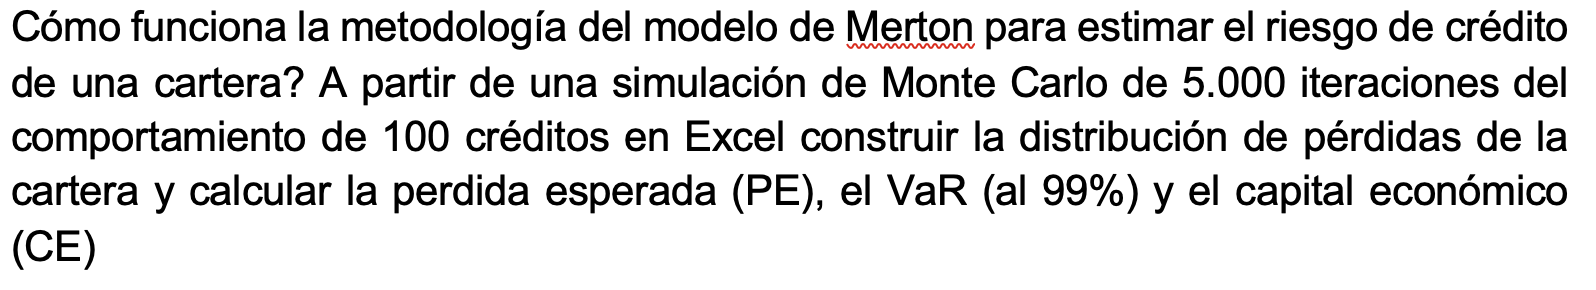

In [2]:
# seed random number generator
seed(1)
# set alpha 
alpha = 0.01
# number of simulations
simulations = 5000
# number of credits
credits = 100
# set time in years
time = 1

rho_values = [0.15, 0.3, 0.45, 0.60, 0.75]
#rho_values = [0.3,0.7]
sigma_values = np.linspace(0.5, 3.25, 15)
lgn_values = np.linspace(0.2, 0.5, 10)

rho = np.empty(shape=credits)
equity_value = np.empty(shape=credits)
mu = np.empty(shape=credits)
sigma = np.empty(shape=credits)
lgd = np.empty(shape = credits)
barrier = np.empty(shape=credits)
y = np.empty(shape=simulations)

credit_value = np.random.randint(5, 100, credits)

for i in list(range(credits)):
    mult = random.uniform(0.3, 0.9) + 1
    
    equity_value[i] = np.round(credit_value[i] * mult,2)
    rho[i] = np.random.choice(rho_values)
    mu[i] = np.round(random.uniform(0.05, 0.75),2)
    sigma[i] = np.round(mu[i] * np.random.choice(sigma_values),2)
    lgd[i] = np.round(np.random.choice(lgn_values),2)
    
    numenator = log(credit_value[i]) - log(equity_value[i])-mu[i]*time + 0.5*time*sigma[i]**2 
    denominator = sigma[i] * sqrt(time)
    
    barrier[i] = np.round(numenator / denominator, 4)

for i in list(range(simulations)):
    y[i] = np.round(norm.ppf(random.random()),4)

In [3]:
data = {
    'rho':rho,
    'equity_value': equity_value,
    'credit_value':credit_value,
    'mu':mu,
    'sigma':sigma,
    'lgd':lgd,
    'barrier':barrier,
}

params = pd.DataFrame.from_dict(data)
params.head()

,rho,equity_value,credit_value,mu,sigma,lgd,barrier
0,0.75,72.56,42,0.19,0.28,0.40,-2.4912
1,0.45,26.91,17,0.73,2.09,0.37,0.4760
2,0.60,106.28,77,0.24,0.45,0.47,-1.0245
3,0.60,19.41,14,0.34,0.97,0.33,-0.2024
4,0.75,128.75,80,0.07,0.13,0.43,-4.1338


In [4]:
list_of_arrays = []

for x in list(range(credits)):
    credit = np.empty(shape = simulations)
    for i in list(range(simulations)):
        credit[i]= sqrt(rho[x]) * y[i] + sqrt(1-rho[x]) * norm.ppf(random.random())
    list_of_arrays.append(credit)

In [5]:
columns = []
for name in list(range(1,101)):
    columns.append('Credit#{}'.format(str(name)))

df_credit = pd.DataFrame(np.array(list_of_arrays).T, columns=columns)

In [6]:
df_credit.shape

(5000, 100)

In [7]:
list_of_arrays_2 = []

for x in list(range(credits)):
    lost = np.empty(shape = simulations)
    for i in list(range(simulations)):
        lost[i]= (credit_value[x] * lgd[x] if barrier[x] > df_credit.iloc[i, x] else 0)
    list_of_arrays_2.append(lost)

In [8]:
columns = []
for name in list(range(1,101)):
    columns.append('Lost#{}'.format(str(name)))
df_lost = pd.DataFrame(np.array(list_of_arrays_2).T, columns=columns)
df_lost['Portfolio_lost'] = df_lost.sum(axis=1)
df_lost.head(3)

,Lost#1,Lost#2,Lost#3,Lost#4,Lost#5,Lost#6,Lost#7,Lost#8,Lost#9,Lost#10,...,Lost#92,Lost#93,Lost#94,Lost#95,Lost#96,Lost#97,Lost#98,Lost#99,Lost#100,Portfolio_lost
0,0.0,6.29,0.00,4.62,0.0,0.0,0.0,0.00,0.0,1.38,...,12.21,0.0,0.00,12.0,0.0,0.0,0.0,0.0,0.00,741.06
1,0.0,6.29,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,...,0.00,0.0,0.00,12.0,0.0,0.0,0.0,0.0,27.06,338.24
2,0.0,6.29,36.19,4.62,0.0,0.0,0.0,15.87,0.0,1.38,...,0.00,0.0,13.16,0.0,0.0,0.0,0.0,0.0,27.06,649.41


In [9]:
VaR_portfolio = np.round(np.percentile(df_lost.iloc[:,-1], (1-alpha)*100),2)
Avg_lost = np.round(np.mean(df_lost.iloc[:,-1]),2)
RC = np.round(VaR_portfolio - Avg_lost,)

print('Alpha: ' + str(alpha))
print('Rho values: '+ (str(rho_values)))
print('Average Lost: ' + str(Avg_lost))
print('VaR: ' + str(VaR_portfolio))
print('Requiered Capital: ' + str(RC))

Alpha: 0.01
Rho values: [0.15, 0.3, 0.45, 0.6, 0.75]
Average Lost: 306.2
VaR: 910.34
Requiered Capital: 604.0
